# Modeling

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn import svm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('poli_2_modified.csv')
df.head(2)

,author,created_utc,domain,downs,id,num_comments,score,selftext,subreddit,subreddit_id,title,ups
0,toadprophet,1.527675e+09,washingtonpost,0,8n7f58,808,15418,0,politics,t5_2cneq,federal prosecutors poised to get more than m...,15418
1,fuzzyshorts,1.527680e+09,axios,0,8n7tbv,536,6809,0,politics,t5_2cneq,hurricane maria killed more people than or ka...,6809


----------
## Count Vectorizer:
-------

#### What is a "Count Vectorizer?" 

A **count vectorizer** converts a collection of text into a matrix of tokens. 

In text processing, **"tokenizing"** (the process of replacing words with unique identifications) and filtering **"stop words"** (common words that appear to be of little value in the selection process) enable the capacity to build a dictionary of featured indices. After processing the text, a count vectorizer is used to prepare the language model (classifier).


The `CountVectorizer` from Scikit Learn, as seen below, supports counts of **N-Grams**; a sequence of $N$ number of words. For example, a 2-Gram, or *bi-gram*, is two-word sentence such as, "Good Morning!". 

Subsequently, the vectorizer is fit to build a dictionary of featured indices yielding a set of sparse matrices to represent the counts.

-------

## Preparing the Data:

- #### The Target will be European news; this model will predict whether the subreddit title is related to Europe.

In [3]:
X = df.title

In [4]:
y = df.subreddit == 'europe' 

### Preparing to train and test the data with `train_test_split`:

- **Train/Test Split:** a method which splits arrays or matrices into random training and testing subsets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Fitting the `X_train` data using `CountVectorizer`:

- **Fit Method:** an estimator that learns the model's parameters from a training set; apprehending the mean and standard deviation for normalization.

In [6]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Transforming the  `X_train` and `X_test` Data:

- **Transform method:** applies the fit method transformation to unseen data. 

In [7]:
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

---------

# Logistic Regression Model:

- **Logistic regression** a linear model for classification that uses a logistic function to describe the probabilities of conceivable outcomes within a single trial.


- Logistic Regression offers two penalties for regularization:

    - **Ridge Regression Regularization (L2):** which adds a penalty equivalent to square of the magnitude of coefficients.

    - **Lasso Regression Regularization (L1):** which adds a penalty equivalent to absolute value of the magnitude of coefficients. Scikit Learn sets this penalty as the default.


- **Alpha:** is a parameter that balances the amount of emphasis given to a coefficient by minimizing the Residual Sum of Squares and Sum of Squares.

--------

####  Fitting the Training Subset with a Logistic Regression Model:
- Alpha of 1

In [8]:
log_reg = LogisticRegression(C=1)
log_reg.fit(X_train_cv, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Logistic Regression - Scoring the `Training` data:

In [9]:
log_reg.score(X_train_cv, y_train)

0.9970695970695971

#### Logistic Regression - Scoring the `Testing` data:

- **Score method:** evaluates the prediction accuracy (quality) of the fit method on the new data; a higher score is desired. 

- **Score:** ~ 89%
    - This model not overfit as it is under the ~ 99% score from the training subset score above.

In [10]:
log_reg.score(X_test_cv, y_test)

0.8903508771929824

#### Logistic Regression - Inspecting the Coefficients:

- The top coefficients used are in the dataframe below.

In [119]:
log_coef_df = pd.DataFrame(log_reg.coef_, columns =cvec.get_feature_names() )

In [ ]:
log_coef_df.T.sort_values(0, ascending=False).head()

In [123]:
log_coef_df.T.sort_values(0).head(10)

,0
trump,-3.538222
trumps,-2.689030
white,-1.344831
mueller,-1.307212
greitens,-1.267065
republicans,-1.258225
giuliani,-1.256028
trade,-1.253883
north,-1.228487
investigation,-1.054431


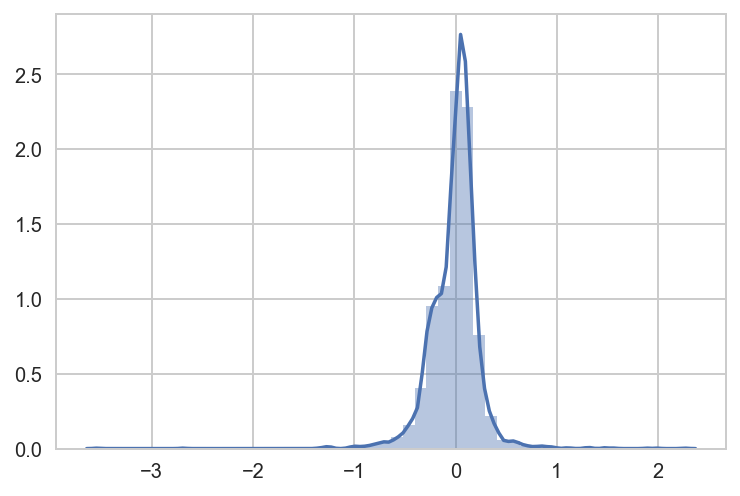

In [169]:
sns.distplot(log_coef_df);

-----------

-----------

## Decision Tree Model

- **Decision Trees:** is a non-parametric supervised learning method used for classification, which predicts the value of a target variable by learning simple decision-rules inferred from the data features. 

    - **DecisionTreeClassifier** is a class capable of performing multi-class (multiple features) classification on a dataset.

In [13]:
tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=100)
tree.fit(X_train_cv, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Decision Tree  - Scoring the `Training` data:

In [14]:
tree.score(X_train_cv, y_train)

0.9091575091575091

#### Decision Tree  - Scoring the `Testing` data:

- **Score:** ~ 86%
    - This model not overfit as it is under the ~ 90% score from the training subset score above.

In [15]:
tree.score(X_test_cv, y_test)

0.8618421052631579

#### The Maximum Depth of the Tree from the Root::

In [16]:
tree.tree_.max_depth

100

---------
## TF-IDF Vectorizer with Random Forest

- **Term Frequency Weighting:** is a simple count of how frequently a word occurs in a document. 


- **Term-Frequency Inverse Document-Frequency:** (commonly pronounced as *Ti-fee-Diff*) is the frequency of a term adjusted (weighted) for how rarely it is used.

    - `TfidfVectorizer`: converts a collection of documents into a matrix of TF-IDF weighted features.

- **Random Forest:** draws a sample from the training data with replacement (bootstrap sampling); meaning a sample is drawn and put back in place to randomly chose a sample again. Furtheremore, when splitting a node the split that is picked is the best split among a random subset of the features. 

In [17]:
tfidf = TfidfVectorizer(stop_words='english', 
                        encoding='unicode-escape', 
                        min_df=2, max_df=.5,
#                         ngram_range=(1,2),
                       )

#### TF-IDF w/Random Forest - Fitting the `X_train` data:

In [18]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='unicode-escape',
        input='content', lowercase=True, max_df=0.5, max_features=None,
        min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
        smooth_idf=True, stop_words='english', strip_accents=None,
        sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, use_idf=True, vocabulary=None)

#### TF-IDF w/Random Forest - Transforming the `X_train` and `X_test` data:

In [19]:
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)

#### TF-IDF w/Random Forest - Creating a sparse dataframe:

In [202]:
X_train_tf_df = pd.SparseDataFrame(X_train_tf, 
                   columns=tfidf.get_feature_names(),
                   default_fill_value=0)

In [203]:
X_train_tf_df.head()

,abc,abe,able,abortion,abrupt,abuse,abused,accept,access,accomplishments,...,years,yellow,yes,yesterday,york,young,youth,youtube,zero,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF w/Random Forest - Creating a sparse dataframe:

In [204]:
X_train_tf_df_dense = pd.DataFrame(X_train_tf.todense(), 
                   columns=tfidf.get_feature_names())

In [205]:
X_train_tf_df_dense.head()

,abc,abe,able,abortion,abrupt,abuse,abused,accept,access,accomplishments,...,years,yellow,yes,yesterday,york,young,youth,youtube,zero,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF w/Random Forest - Instantiating the  `RandomForestClassifier`:

In [206]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3)

#### TF-IDF w/Random Forest - Fitting the `training ` data:

In [207]:
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### TF-IDF w/Random Forest - Scoring the `training ` data:

In [208]:
rf.score(X_train_tf, y_train)

0.9032967032967033

#### TF-IDF w/Random Forest - Fitting the `test ` data:

- **Score:** ~ 86%
    - This model not overfit as it is under the ~ 90% score from the training subset score above.

In [209]:
rf.score(X_test_tf, y_test)

0.868421052631579

#### TF-IDF w/Random Forest - Average Value of the target:

In [210]:
y_test.mean()

0.5307017543859649

In [211]:
len(tfidf.get_feature_names())

1554

In [212]:
rf.feature_importances_.shape

(1554,)

In [213]:
feat_importance = pd.DataFrame(rf.feature_importances_, 
                               index=tfidf.get_feature_names(), 
                               columns=['loading'])

In [214]:
feat_importance.shape

(1554, 1)

In [215]:
X_train.str.contains('trump').sum()

283

In [216]:
X_train.str.contains('trumps').sum()

62

In [217]:
feat_importance.sort_values('loading', ascending=False).head() #

,loading
trump,0.194065
trumps,0.058513
europe,0.043096
eu,0.027939
european,0.022550


In [221]:
feat_importance

,loading
abc,0.000000e+00
abe,0.000000e+00
able,0.000000e+00
abortion,8.186875e-04
abrupt,0.000000e+00
abuse,0.000000e+00
abused,0.000000e+00
accept,0.000000e+00
access,0.000000e+00
accomplishments,1.534954e-04


In [219]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, rf.predict(X_test_tf))

array([[156,  58],
       [  4, 238]])

---------

## Adaboost Classifier:

- **AdaBoost:** fits a sequence of weak learners on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority-sum to produce the final prediction. 

In [39]:
ada = AdaBoostClassifier()

In [40]:
params = {}

In [41]:
gs = GridSearchCV(ada, params)

#### Adaboost - Fitting the `training` data:

In [42]:
gs.fit(X_train_tf, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Adaboost - Scoring the `training` data:

In [43]:
gs.score(X_train_tf, y_train)

0.8681318681318682

#### Adaboost - Scoring the `test` data:

- **Score:** ~ 86%
    - This model not overfit as it is under the ~ 90% score from the training subset score above.

In [44]:
gs.score(X_test_tf, y_test)

0.8421052631578947

----------

## Gridsearch - Random Forest with TF-IDF

- `GridSearchCV`: is an exhaustive search over specified parameters finding the optimum parameters.

#### Creating a `pipeline`:

In [45]:
rf_tf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', 
                              encoding='unicode-escape')),
    ('rf', RandomForestClassifier())
])

#### Gridsearch - Parameters:

In [46]:
rf_tf_params = {
    'tfidf__min_df': list(range(1,6)),
    'tfidf__max_df': list(np.linspace(.5, 1, 10)),
    'rf__max_depth': list(np.linspace(5, 500, 10)),
    'rf__min_samples_leaf': list(range(1,10)),
    'rf__n_estimators': [10, 50, 100],
}

In [47]:
rf_tf_gs = GridSearchCV(rf_tf_pipe, rf_tf_params,
#                        n_jobs=-1,
                        n_jobs=3,
                       )

#### Gridsearch - Fitting the `training` data:

In [49]:
rf_tf_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='unicode-escape',
        input='content', lowercase=True, max_df=1.0, max_features=None,
        min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
        s...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'tfidf__min_df': [1, 2, 3, 4, 5], 'tfidf__max_df': [0.5, 0.5555555555555556, 0.6111111111111112, 0.6666666666666666, 0.7222222222222222, 0.7777777777777778, 0.8333333333333333, 0.8888888888888888, 0.9444444444444444, 1.0], 'rf__max_depth': [5.0, 60.0, 115.0, 170.0, 225.0, 280.0, 335.0, 390.0, 445.0, 500.0], 'rf__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'rf__n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, re

#### Gridsearch - Scoring the `training` data:

In [50]:
rf_tf_gs.score(X_train, y_train)

0.9985347985347985

#### Gridsearch - Scoring the `testing` data:

In [51]:
rf_tf_gs.score(X_test, y_test)

0.8771929824561403

-------------

## Logistic Regression with Cross Validation:

#### Cross Validation Score with 5 Folds:

In [52]:
logistic = LogisticRegression()
cross_val_score(logistic, X_train_cv, y_train, scoring='accuracy', cv=5).mean()

0.8798467562207366

-----------

# Support Vector Machine (SVM) Modeling:

- **Support Vector Machines (SVM):** are classification models used to find and differentiate classes in n-dimensional space using a hyper-plane.

---------

### SVM with a Radial Basis Function (RBF) Kernel:
- Alpha (`C`) of 1
- `gamma` of .25

**Cross Validation Score:** ~ .83% 

In [53]:
clf = svm.SVC(
              gamma=0.25, 
              random_state=42)
cross_val_score(clf, X_train_cv, y_train, scoring='accuracy', cv=5).mean()

0.8351307451672415

### SVM with a Linear Kernel: 
- Alpha (`C`) of 1
- `gamma` is defaulted to "auto"

**Cross Validation Score:** ~ .89% 

In [54]:
svc = svm.SVC(
              kernel='linear',
              random_state=42)
cross_val_score(svc, X_train_cv, y_train, scoring='accuracy', cv=5).mean()

0.8879081363033702

### SVM with a Polynomial Kernel: 
- An alpha (`C`) of 1
- `gamma` is .35

**Cross Validation Score:** ~ .89% 

In [55]:
poly_svc = svm.SVC( 
              kernel='poly', 
              degree=1, 
              gamma=0.35, 
              random_state=42)
cross_val_score(poly_svc, X_train_cv, y_train, scoring='accuracy', cv=5).mean()

0.8886434107612725

### SVM with a Sigmoid Kernel: 
- An alpha (`C`) of 1
- `gamma` is .11

**Cross Validation Score:** ~ .87% 

In [56]:
svc = svm.SVC(C=1, 
              kernel='sigmoid',
              gamma = .11,
              random_state=42)
cross_val_score(svc, X_train_cv, y_train, scoring='accuracy', cv=5).mean()

0.8636971015244953

## Gridsearching with SVM:

In [ ]:
# clf = svm.SVC(random_state=42)
# 
# param_grid = {
#     'gamma': np.logspace(-1, 2, 5),
#     'kernel' : ('poly','linear','sigmoid'),
#     'degree' : np.logspace(-1, 4, 5),
# }
# 
# grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=3)
# grid.fit(X_train_cv, y_train)

#### Average Test Score: ~

In [ ]:
# grid.cv_results_['mean_test_score']

#### Best Parameters:

In [ ]:
# grid.best_params_

#### Average Test Score: ~

In [ ]:
# grid_mean_scores = grid.cv_results_['mean_test_score']
# grid_mean_scores.mean()